In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

#import pathlib as Path
# Anthony promises to learn about pathlib

In [2]:
data_base_dir = '~/Documents/MDA_Scans_Seidler'
data_base_dir = '/Users/anthonygironda/Documents/MDA_Scans_Seidler'

In [34]:
fname = data_base_dir + "/7bmb1_1104.hdf5"
print(fname)
with h5py.File(fname, 'r') as f:
    print(f.keys())

/Users/anthonygironda/Documents/MDA_Scans_Seidler/7bmb1_1104.hdf5
<KeysViewHDF5 ['7bma1:Slit1Ht2.C', '7bma1:Slit1Vt2.C', '7bmb1:aero:m1.VAL', '7bmb1:aero:m2.VAL', 'Extra PVs', 'Positioner_0', 'S:SRcurrentAI.VAL', 'dxpMercury:dxp1:Events', 'dxpMercury:dxp1:Triggers', 'dxpMercury:mca1.R1', 'dxpMercury:mca1.VAL']>


In [40]:
fname = data_base_dir + "/7bmb1_1082.hdf5"
with h5py.File(fname, 'r') as f:
    data = f['7bma1:Slit1Vt2.VAL']#[...]

KeyError: "Unable to open object (object '7bma1:Slit1Vt2.VAL' doesn't exist)"

In [41]:
print(data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [108]:

def stackplot(filename, low_bin, high_bin, vert_space, hor_space):
    fname = data_base_dir + "/"+filename
    with h5py.File(fname, 'r') as f:
        data = f['dxpMercury:mca1.VAL'][...]
    plt.figure(figsize=(4,6))
    for i in range(data.shape[0]):
        plt.plot(data[i,(low_bin + i*hor_space):(high_bin + i*hor_space)]+i*vert_space)
        #print(data[i,(low_bin + i*hor_space):(high_bin + i*hor_space)]+i*vert_space)
        
    plt.title(filename)
    plt.show()
    

In [109]:

def stackplot(filename, low_bin, high_bin, vert_space, hor_space):
    fname = data_base_dir + "/"+filename
    with h5py.File(fname, 'r') as f:
        data = f['dxpMercury:mca1.VAL'][...]
    plt.figure(figsize=(4,6))
    for i in range(data.shape[0]):
        plt.plot(data[i,(low_bin + i*hor_space):(high_bin + i*hor_space)]+i*vert_space)
        #print(data[i,(low_bin + i*hor_space):(high_bin + i*hor_space)]+i*vert_space)
        
    plt.title(filename)
    #plt.show()
    print (data)
    

In [110]:
y_ticks = np.linspace(6,14,33)

[[   0. 1128. 1283. ...    9.    3.    5.]
 [   0. 1098. 1446. ...   15.    5.    6.]
 [   0. 1041. 1299. ...   11.    5.    8.]
 ...
 [   0. 1063. 1344. ...    9.   16.    7.]
 [   0. 1028. 1275. ...   10.   14.    9.]
 [   0. 1107. 1266. ...    7.    6.    2.]]


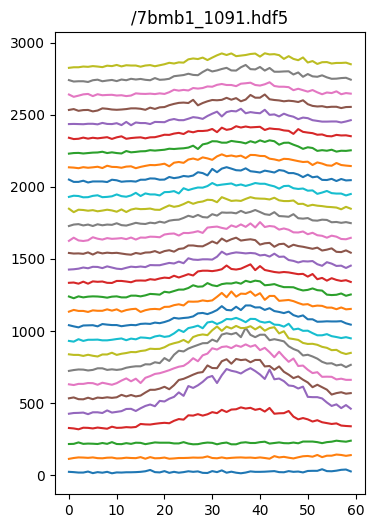

In [111]:
stackplot("/7bmb1_1091.hdf5", 1280, 1340, 100,0)

[[   0. 1076. 1327. ...    7.    7.    6.]
 [   0. 1066. 1279. ...   12.    7.    6.]
 [   0. 1056. 1225. ...   12.    8.    4.]
 ...
 [   0. 1036. 1268. ...    7.    7.   17.]
 [   0. 1070. 1302. ...   11.   16.   13.]
 [   0. 1053. 1237. ...    6.   11.   13.]]


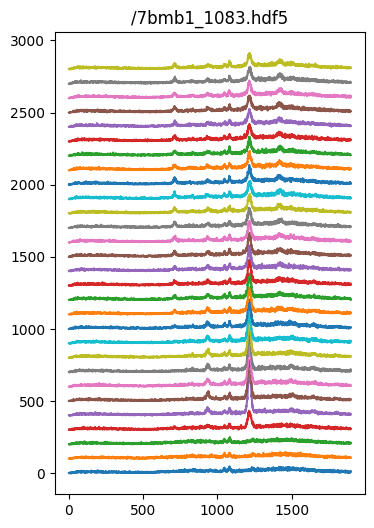

In [112]:
stackplot("/7bmb1_1083.hdf5", 100, 2000, 100,0)

In [113]:
def stackplot_diff(filename, low_bin, high_bin, vert_space, hor_space):
    fname = data_base_dir + "/"+filename
    with h5py.File(fname, 'r') as f:
        data = f['dxpMercury:mca1.VAL'][...]
    plt.figure(figsize=(4,6))
    for i in range(data.shape[0]):
        last = data[i,low_bin:high_bin]
    for i in range(data.shape[0]):
        plt.plot((data[i,low_bin:high_bin]-last)[(i*hor_space):]+i*vert_space)
    plt.title(filename)
    plt.show()

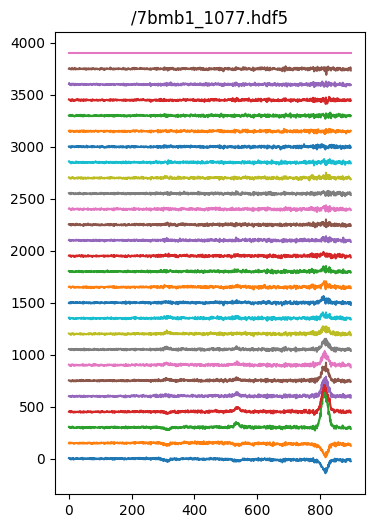

In [114]:
stackplot_diff("/7bmb1_1077.hdf5", 500,1400,150, 0)

In [115]:
def strip_plot(filename, low_bin, high_bin, r_step):
    fname = data_base_dir + "/"+filename
    with h5py.File(fname, 'r') as f:
        data = f['dxpMercury:mca1.VAL'][...]
    plt.figure(figsize=(4,6))
    integrated_intensity = []
    x_coord = []
    for i in range(data.shape[0]):
        integral_temp = sum(data[i,low_bin:high_bin])
        integrated_intensity.append( integral_temp)
        x_coord.append(i*r_step)
    plt.plot(x_coord, integrated_intensity)
    plt.title(filename)
    plt.show()

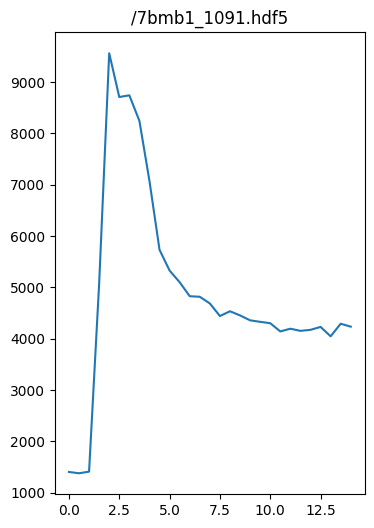

In [116]:
strip_plot("/7bmb1_1091.hdf5", 1280, 1340, 0.5)